# Prepare Enviorment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/'Colab Notebooks'/

/content/drive/MyDrive/Colab Notebooks


In [3]:
%cd Thesis/PeerRead/code/accept_classify/

/content/drive/MyDrive/Colab Notebooks/Thesis/PeerRead/code/accept_classify


In [4]:
import json
import pandas as pd
import os
from tqdm.notebook import tqdm
import os, re, random, time, pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, plot_roc_curve

In [5]:
path = '../../my_data/Figures/Overall Analysis-'

# Load the parameter search results


> 



In [6]:
def returnDF(filename):
  with open('../../my_data/'+filename, "rb") as f:
    quick_logs=pickle.load(f)  
  df=pd.DataFrame(quick_logs,columns=['lr', 'seed','auc','accuracy'])
  df['avg'] = df.apply(lambda row: (row['auc']+row['accuracy'])/2, axis=1)
  return df

In [7]:
names = ['bert_quick_logs-16','scibert_quick_logs-16']
models = ['Bert','SciBert']
dirs  = ['01-Paper-Acceptance', '02-Review-Acceptance'] #'03-Paper-Score', '04-Review-Score']

In [8]:
DF = []
for dir in dirs:
  temp = []
  for name in names:
    df = returnDF(dir+'/'+name)
    temp.append(df)
  DF.append(temp)

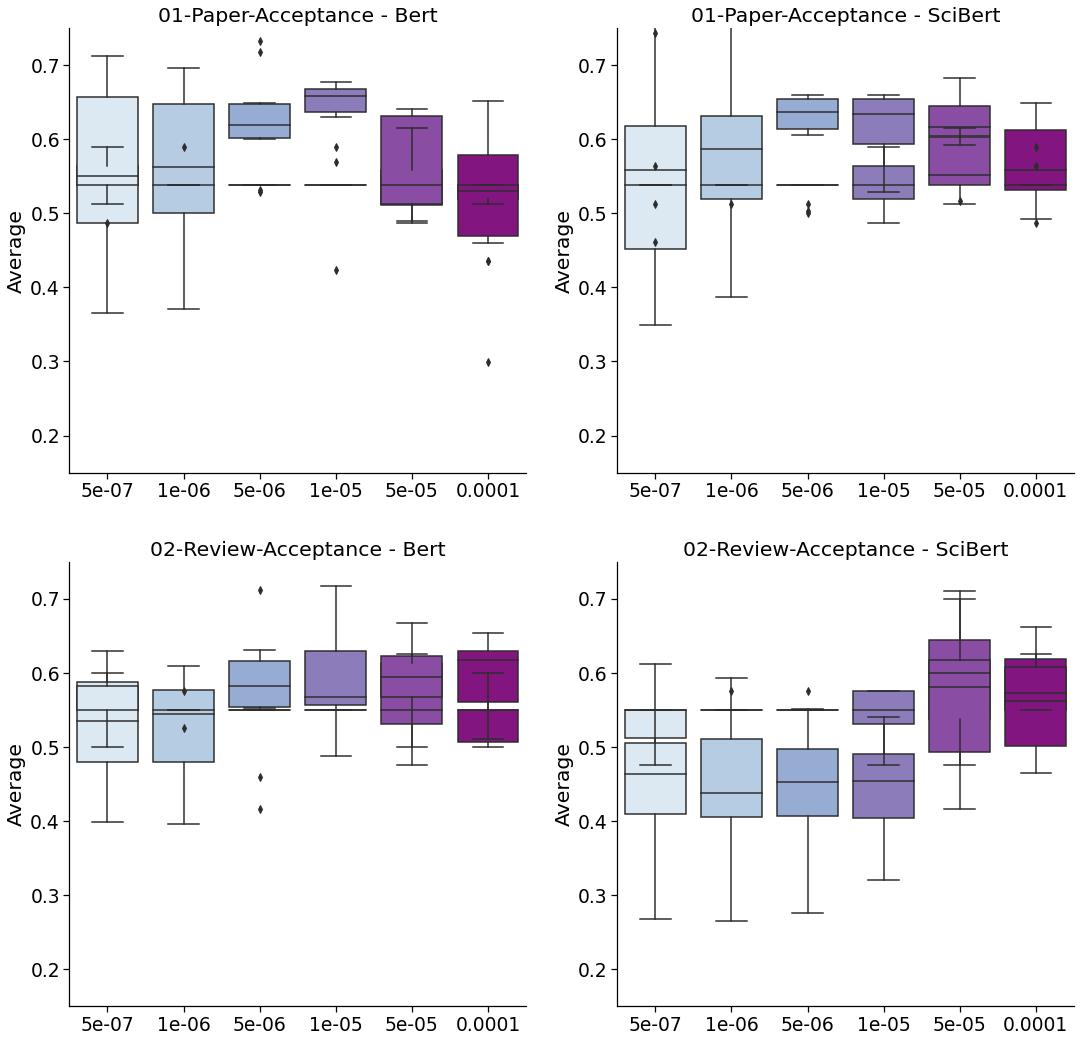

In [ ]:
sns.set_context("notebook", font_scale=1.7)


fig,axs=plt.subplots(len(dirs),len(names),figsize=(18,18))
for i in range(len(dirs)):
  for j in range(len(names)):
    sns.boxplot(data=DF[i][j],x='lr',y='accuracy',ax=axs[i,j], palette="BuPu", saturation=100)
    sns.boxplot(data=DF[i][j],x='lr',y='auc',ax=axs[i,j], palette="BuPu", saturation=100)
    axs[i,j].set_title(dirs[i]+' - '+models[j])
    axs[i,j].set_ylim(0.15,0.75)
    axs[i,j].set_xlabel('') 
    axs[i,j].set_ylabel('Average') 
    sns.despine()

#plt.savefig(path+'Learning Rate',  dpi=400, bbox_inches = 'tight', pad_inches = 0 )


## Updated hyperparameter plots

In [9]:
# get each df
df_01_bert    = DF[0][0]
df_01_scibert = DF[0][1]
df_02_bert    = DF[1][0]
df_02_scibert = DF[1][1]

# add model name
df_01_bert    ['model'] = 'bert'
df_01_scibert ['model'] = 'scibert'
df_02_bert    ['model'] = 'bert'
df_02_scibert ['model'] = 'scibert'

# add experiment name
df_01_bert    ['exp'] = 'paper'
df_01_scibert ['exp'] = 'paper'
df_02_bert    ['exp'] = 'review'
df_02_scibert ['exp'] = 'review'

df_all = pd.concat([df_01_bert, df_01_scibert, df_02_bert, df_02_scibert])

In [10]:
def mask(df,key,value):
  return df[df[key] == value]

pd.DataFrame.mask = mask  

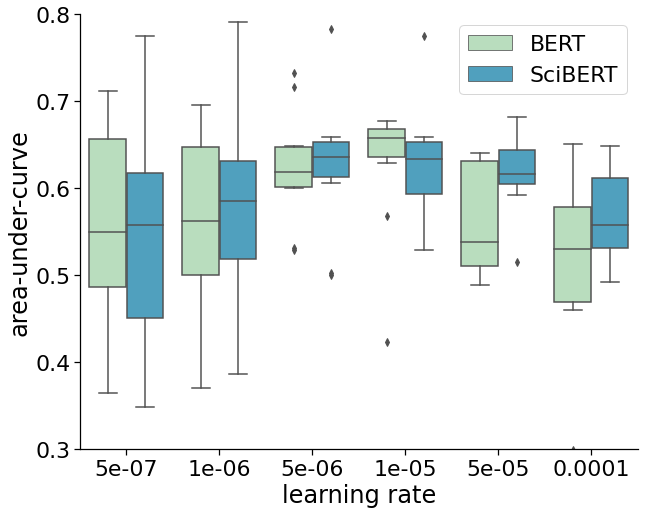

In [44]:
sns.set_context("notebook", font_scale=2)
fig,ax = plt.subplots(figsize = (10,8))
g=sns.boxplot(data=df_all.mask('exp','paper'), x='lr',y='auc',hue='model', palette="GnBu", saturation=0.80)
sns.despine()
ax.set_ylabel('area-under-curve')
ax.set_xlabel('learning rate')
ax.set_ylim(0.3,0.8)

handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, ['BERT','SciBERT'], loc="best") # Associate manually the artists to a label.
plt.savefig(path+'Paper_auc_lr',  dpi=400, bbox_inches = 'tight', pad_inches = 0 )

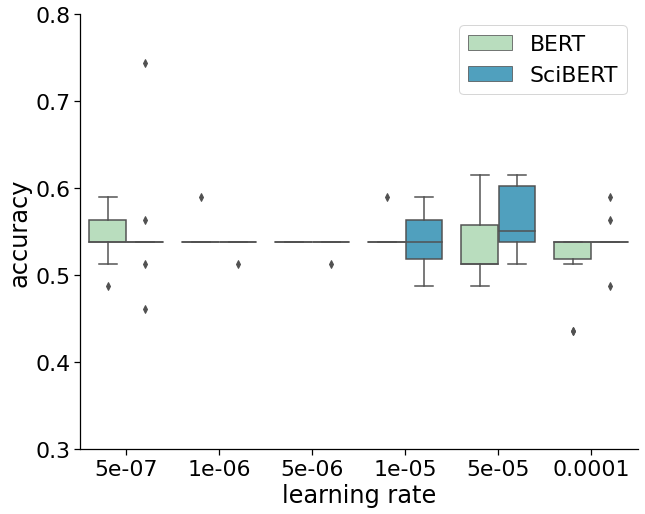

In [43]:
sns.set_context("notebook", font_scale=2)
fig,ax = plt.subplots(figsize = (10,8))
g=sns.boxplot(data=df_all.mask('exp','paper'), x='lr',y='accuracy',hue='model', palette="GnBu", saturation=0.80)
sns.despine()
ax.set_ylabel('accuracy')
ax.set_xlabel('learning rate')
ax.set_ylim(0.3,0.8)

handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, ['BERT','SciBERT'], loc="best") # Associate manually the artists to a label.
plt.savefig(path+'Paper_acc_lr',  dpi=400, bbox_inches = 'tight', pad_inches = 0 )


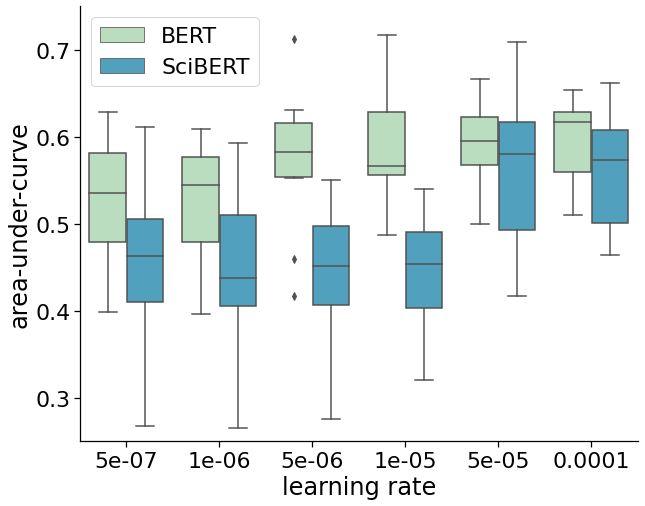

In [40]:
sns.set_context("notebook", font_scale=2)
fig,ax = plt.subplots(figsize = (10,8))
g=sns.boxplot(data=df_all.mask('exp','review'), x='lr',y='auc',hue='model',palette="GnBu", saturation=0.80)
sns.despine()
ax.set_ylabel('area-under-curve')
ax.set_xlabel('learning rate')
ax.set_ylim(0.25, 0.75)

handles, _ = ax.get_legend_handles_labels()         
ax.legend(handles, ['BERT','SciBERT'], loc="best") 
plt.savefig(path+'Review_auc_lr',  dpi=400, bbox_inches = 'tight', pad_inches = 0 )


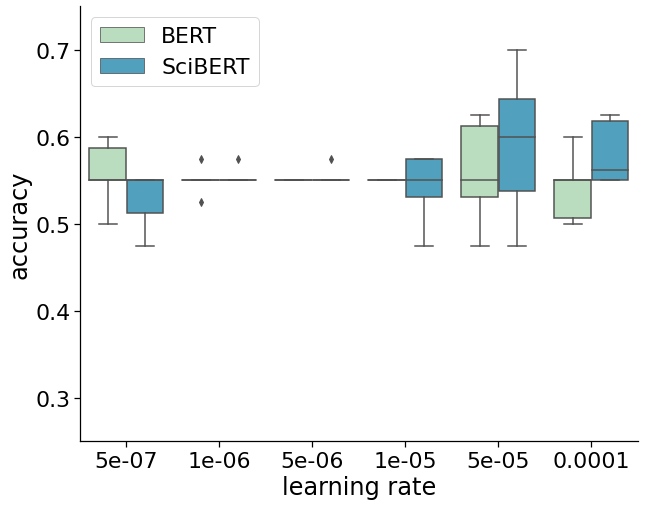

In [42]:
sns.set_context("notebook", font_scale=2)
fig,ax = plt.subplots(figsize = (10,8))
g=sns.boxplot(data=df_all.mask('exp','review'), x='lr',y='accuracy',hue='model', palette="GnBu", saturation=0.80)
sns.despine()
ax.set_ylabel('accuracy')
ax.set_xlabel('learning rate')
ax.set_ylim(0.25, 0.75)

handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['BERT','SciBERT'], loc="best") 
plt.savefig(path+'Review_acc_lr',  dpi=400, bbox_inches = 'tight', pad_inches = 0 )


# Analysis of results

In [ ]:
def returnDF(filename):
  with open('../../my_data/'+filename, "rb") as f:
    outcome=pickle.load(f)  
  df=pd.DataFrame(outcome,columns=['roc_auc' 	'accuracy' 	'probs' 	'fpr 	tpr])
  df['avg'] = df.apply(lambda row: (row['auc']+row['accuracy'])/2, axis=1)
  return df

In [ ]:
names = ['bert_outcome-16','scibert_outcome-16']
models = ['Bert','SciBert']
dirs  = ['01-Paper-Acceptance', '02-Review-Acceptance'] #'03-Paper-Score', '04-Review-Score']

In [ ]:
DF = []
for dir in dirs:
  temp = []
  for name in names:
    df = returnDF(dir+'/'+name)
    temp.append(df)
  DF.append(temp)

In [ ]:
DF

[[   lr  seed  auc  accuracy  avg
  0 NaN   NaN  NaN  0.657895  NaN
  1 NaN   NaN  NaN  0.605263  NaN
  2 NaN   NaN  NaN  0.684211  NaN
  3 NaN   NaN  NaN  0.605263  NaN
  4 NaN   NaN  NaN  0.657895  NaN
  5 NaN   NaN  NaN  0.605263  NaN
  6 NaN   NaN  NaN  0.631579  NaN
  7 NaN   NaN  NaN  0.710526  NaN
  8 NaN   NaN  NaN  0.605263  NaN
  9 NaN   NaN  NaN  0.657895  NaN,    lr  seed  auc  accuracy  avg
  0 NaN   NaN  NaN  0.552632  NaN
  1 NaN   NaN  NaN  0.526316  NaN
  2 NaN   NaN  NaN  0.657895  NaN
  3 NaN   NaN  NaN  0.605263  NaN
  4 NaN   NaN  NaN  0.605263  NaN
  5 NaN   NaN  NaN  0.657895  NaN
  6 NaN   NaN  NaN  0.684211  NaN
  7 NaN   NaN  NaN  0.578947  NaN
  8 NaN   NaN  NaN  0.631579  NaN
  9 NaN   NaN  NaN  0.605263  NaN], [   lr  seed  auc  accuracy  avg
  0 NaN   NaN  NaN  0.631579  NaN
  1 NaN   NaN  NaN  0.605263  NaN
  2 NaN   NaN  NaN  0.578947  NaN
  3 NaN   NaN  NaN  0.657895  NaN
  4 NaN   NaN  NaN  0.684211  NaN
  5 NaN   NaN  NaN  0.631579  NaN
  6 NaN   NaN 

In [ ]:
sns.set_context("notebook", font_scale=1.7)


fig,axs=plt.subplots(len(dirs),len(names),figsize=(18,18))
for i in range(len(dirs)):
  for j in range(len(names)):
    sns.boxplot(data=DF[i][j],x='lr',y='avg',ax=axs[i,j], palette="BuPu", saturation=100)
    axs[i,j].set_title(dirs[i]+' - '+models[j])
    axs[i,j].set_ylim(0.15,0.75)
    axs[i,j].set_xlabel('') 
    axs[i,j].set_ylabel('Average') 
    sns.despine()

plt.savefig(path+'Learning Rate',  dpi=400, bbox_inches = 'tight', pad_inches = 0 )


In [ ]:
with open('../../my_data/02-Review-Acceptance/bert_outcome-16', "rb") as f:
    outcome_16=pickle.load(f) 
df_16=pd.DataFrame(outcome_16)

df_16

,roc_auc,accuracy,probs,fpr,tpr
0,0.591304,0.631579,"[[0.9082663, 0.09173366], [0.91442376, 0.08557...","[0.0, 0.0, 0.043478260869565216, 0.04347826086...","[0.0, 0.06666666666666667, 0.06666666666666667..."
1,0.626087,0.605263,"[[0.95649487, 0.0435052], [0.8960344, 0.103965...","[0.0, 0.0, 0.0, 0.13043478260869565, 0.1304347...","[0.0, 0.06666666666666667, 0.2, 0.2, 0.2666666..."
2,0.571014,0.578947,"[[0.8072525, 0.19274749], [0.6504352, 0.349564...","[0.0, 0.0, 0.0, 0.043478260869565216, 0.043478...","[0.0, 0.06666666666666667, 0.13333333333333333..."
3,0.582609,0.657895,"[[0.92592865, 0.074071325], [0.900069, 0.09993...","[0.0, 0.043478260869565216, 0.0434782608695652...","[0.0, 0.0, 0.26666666666666666, 0.266666666666..."
4,0.649275,0.684211,"[[0.7403236, 0.25967643], [0.61115927, 0.38884...","[0.0, 0.0, 0.0, 0.08695652173913043, 0.0869565...","[0.0, 0.06666666666666667, 0.2, 0.2, 0.2666666..."
5,0.571014,0.631579,"[[0.8511643, 0.14883575], [0.7939642, 0.206035...","[0.0, 0.0, 0.0, 0.043478260869565216, 0.043478...","[0.0, 0.06666666666666667, 0.13333333333333333..."
6,0.431884,0.526316,"[[0.74885994, 0.25114006], [0.6934486, 0.30655...","[0.0, 0.043478260869565216, 0.1739130434782608...","[0.0, 0.0, 0.0, 0.13333333333333333, 0.1333333..."
7,0.634783,0.552632,"[[0.81263053, 0.18736948], [0.89429605, 0.1057...","[0.0, 0.043478260869565216, 0.0434782608695652...","[0.0, 0.0, 0.13333333333333333, 0.133333333333..."
8,0.513043,0.552632,"[[0.90893435, 0.091065615], [0.81925267, 0.180...","[0.0, 0.043478260869565216, 0.1304347826086956...","[0.0, 0.0, 0.0, 0.13333333333333333, 0.1333333..."
9,0.628986,0.605263,"[[0.6170595, 0.3829405], [0.62026876, 0.379731...","[0.0, 0.043478260869565216, 0.0869565217391304...","[0.0, 0.0, 0.0, 0.26666666666666666, 0.2666666..."


In [ ]:
PROBS = np.array([out['probs'] for out in outcome_16])
ACC   = np.array([out['accuracy'] for out in outcome_16])
FPR   = np.array([out['fpr'] for out in outcome_16])
TPR   = np.array([out['tpr'] for out in outcome_16])
AUC   = np.array([out['roc_auc'] for out in outcome_16])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


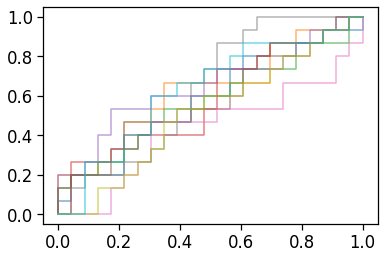

In [ ]:
for i in range(10):
  plt.plot(FPR[i],TPR[i],alpha=0.6)

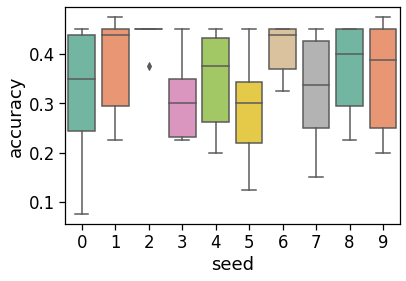

In [ ]:
sns.boxplot(data=df,x='seed',y='accuracy', palette="Set2")